In [1]:
import re
import requests
import json
import sqlite3
import glob
import urllib.parse
from bs4 import BeautifulSoup
import MeCab as mc
from collections import Counter
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel

In [2]:
def format_sentence(contents):
#     content_list = []
#     for content in contents:
#         content_list.append(re.sub("[[^\x01-\x7E]|\w]+", "", content))
#     return content_list
    sentense = " ".join(contents)
    sentense = re.sub("[[^\x01-\x7E]|\w]+", "", sentense)
    return sentense

In [3]:
def connect():
    global conn
    conn = sqlite3.connect('./ttc_blog.db')

def close():
    conn.close()
    
def get_all_contents(limit, offset=0):
    return [record[0] for record in 
               conn.execute(
            'SELECT content FROM contents LIMIT ? OFFSET ?',
            (limit, offset))]

In [4]:
def mecab_analysis(texts):
    t = mc.Tagger("-d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd")
    t.parse('')
    output = []
    node =  t.parseToNode(texts)  
    while node:
        if node.surface != "":  # ヘッダとフッタを除外
            word_type = node.feature.split(",")[0]
            if word_type in ['名詞']:
                output.append(node.surface)
        node = node.next
        if node is None:
            break
    return output


In [5]:
connect()
contents = get_all_contents(limit=-1)
close()

In [31]:
# content = mecab_analysis(format_sentence(contents))
# content_list = format_sentence(contents)
# for content in list:
#     contents_list.append(mecab_analysis(content))
# print(contents_list)

['論語',
 '会社',
 '算盤',
 '会社',
 '書籍',
 '人間学',
 'マーケッティング',
 '中',
 'くだり',
 '本',
 '今',
 '部長',
 '課題図書',
 '本',
 '今月',
 '号',
 '５月',
 '致知',
 '書籍',
 'こと',
 '記事',
 '推薦',
 'こと',
 '木鶏',
 '会',
 '参加',
 '人',
 '記事',
 '木鶏',
 '会',
 'アフター',
 '内容',
 '先',
 '今',
 'どこ',
 'の',
 '方策',
 'こと',
 '参加者',
 '９',
 '名',
 '以下',
 'チェック',
 '表',
 '致知',
 '年月',
 '号',
 '結果',
 '以下',
 '木鶏',
 '会',
 'メンバー',
 '論語',
 '系',
 'の',
 '最後',
 'どちら',
 'あなた',
 '論語',
 '系',
 '算盤',
 '系',
 '質問',
 '１',
 '名',
 '以外',
 '論語',
 '系',
 'こと',
 '機能',
 '１つ',
 'ブレイクアウト',
 'ルーム',
 '人',
 '個室',
 'こと',
 'これ',
 '便利',
 '１',
 '０',
 '人',
 'セミナー',
 '会場',
 '７',
 '名',
 '２',
 '系列',
 '参加',
 '３',
 '名',
 '場合',
 '２',
 '班',
 'グループディスカッション',
 'グループ',
 '１',
 '会場',
 '４',
 '名',
 '参加',
 '１',
 '名',
 'グループ',
 '２',
 '会場',
 '３',
 '名',
 '参加',
 '２',
 '名',
 '会場',
 '７',
 '名',
 '４',
 '名',
 '３',
 '名',
 '場所',
 '移動',
 'グループ',
 'グループ',
 '１',
 '系列',
 'そこ',
 '参加者',
 '追加',
 '大部屋',
 '個別',
 'ミーティング',
 'こと',
 'これ',
 '無料',
 '驚き',
 '今週末',
 '金',
 '部長',
 '推薦',
 '者',
 'ＰＭ',
 '候補',
 '人',
 '愛と青春の旅立ち',
 '

In [7]:
wakati = []
for co in contents:
    sentense = re.sub("[[^\x01-\x7E]|\w]+", "", co)
    af_me = mecab_analysis(sentense)
    wakati.append(af_me)

In [8]:
stop_words = ["こと", "もの", "それ", "よう", "さん", "とき", "いつ", "ほう", "そう", "ところ", 
              "これ", "くん", "さま", "それぞれ", "ため", "そこ", "の", "ん",
              "１", "２", "３", "４", "５", "６", "７", "８", "９", "０"]

change_word = []
for text in wakati:
    change_word.append([word for word in text if word not in stop_words])
change_word

[['論語',
  '会社',
  '算盤',
  '会社',
  '書籍',
  '人間学',
  'マーケッティング',
  '中',
  'くだり',
  '本',
  '今',
  '部長',
  '課題図書',
  '本',
  '今月',
  '号',
  '５月',
  '致知',
  '書籍',
  '記事',
  '推薦',
  '木鶏',
  '会',
  '参加',
  '人',
  '記事',
  '木鶏',
  '会',
  'アフター',
  '内容',
  '先',
  '今',
  'どこ',
  '方策',
  '参加者',
  '名',
  '以下',
  'チェック',
  '表',
  '致知',
  '年月',
  '号',
  '結果',
  '以下',
  '木鶏',
  '会',
  'メンバー',
  '論語',
  '系',
  '最後',
  'どちら',
  'あなた',
  '論語',
  '系',
  '算盤',
  '系',
  '質問',
  '名',
  '以外',
  '論語',
  '系'],
 ['機能',
  '１つ',
  'ブレイクアウト',
  'ルーム',
  '人',
  '個室',
  '便利',
  '人',
  'セミナー',
  '会場',
  '名',
  '系列',
  '参加',
  '名',
  '場合',
  '班',
  'グループディスカッション',
  'グループ',
  '会場',
  '名',
  '参加',
  '名',
  'グループ',
  '会場',
  '名',
  '参加',
  '名',
  '会場',
  '名',
  '名',
  '名',
  '場所',
  '移動',
  'グループ',
  'グループ',
  '系列',
  '参加者',
  '追加',
  '大部屋',
  '個別',
  'ミーティング',
  '無料',
  '驚き'],
 ['今週末',
  '金',
  '部長',
  '推薦',
  '者',
  'ＰＭ',
  '候補',
  '人',
  '愛と青春の旅立ち',
  '年',
  'アメリカ映画',
  '数',
  '十',
  '年',
  '前',
  '映画',
  '印象',
  '映画',

In [9]:
fpath = "/home/y-watanabe/.local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/ipaexg.ttf"
# word_list = ["現在", "閲覧", "年月日", "これ", "参照", "それ", "表記", "詳細", "影響", "地域", "項目", "こと", "よう", "年月", "および",
#              "以降", "一部", "その後", "ため", "もの", "使用", "多く", "所蔵", "近年", "場合", "中心", "時点", "一覧", "規定", "その他"]
wordcloud = WordCloud(
    background_color="black",
    stopwords=word_list,
    font_path=fpath,
    max_words=70,
    width=800,
    collocations = False,
    height=600).generate(" ".join(content))

NameError: name 'word_list' is not defined

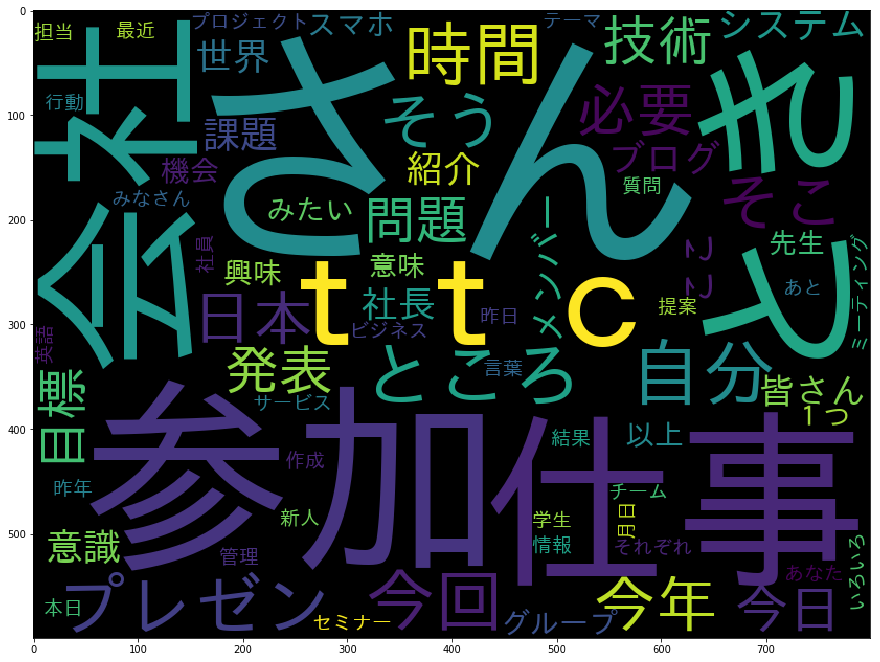

In [38]:
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)

In [14]:
dictionary = Dictionary(change_word)
dictionary.filter_extremes(no_below=2, no_above=0.3)
corpus = [dictionary.doc2bow(doc) for doc in change_word]
lda = LdaModel(corpus, num_topics=4, id2word=dictionary, passes=10)

In [15]:
for topic in lda.show_topics(num_topics=-1, num_words=20):
    print("topic id:{0[0]}, words={0[1]}".format(topic))

topic id:0, words=0.007*"会社" + 0.006*"中" + 0.006*"名" + 0.005*"システム" + 0.005*"年" + 0.005*"今" + 0.005*"話" + 0.005*"時" + 0.005*"発表" + 0.004*"会" + 0.004*"今回" + 0.004*"日本" + 0.004*"社長" + 0.004*"ｔｔｃ" + 0.004*"英語" + 0.004*"紹介" + 0.004*"方" + 0.004*"管理" + 0.004*"参加" + 0.003*"的"
topic id:1, words=0.017*"年" + 0.010*"今" + 0.007*"前" + 0.007*"ｔｔｃ" + 0.006*"仕事" + 0.005*"会社" + 0.005*"何" + 0.005*"参加" + 0.005*"君" + 0.005*"話" + 0.004*"中" + 0.004*"自分" + 0.004*"目標" + 0.004*"本" + 0.004*"方" + 0.004*"プロジェクト" + 0.004*"時間" + 0.003*"必要" + 0.003*"的" + 0.003*"室"
topic id:2, words=0.010*"日" + 0.007*"年" + 0.007*"今" + 0.007*"仕事" + 0.006*"何" + 0.005*"前" + 0.005*"時間" + 0.005*"時" + 0.004*"方" + 0.004*"提案" + 0.004*"者" + 0.004*"中" + 0.004*"目" + 0.004*"自分" + 0.003*"今回" + 0.003*"回" + 0.003*"気" + 0.003*"話" + 0.003*"一" + 0.003*"名"
topic id:3, words=0.012*"時" + 0.009*"何" + 0.008*"プレゼン" + 0.007*"参加" + 0.007*"名" + 0.007*"方" + 0.007*"君" + 0.006*"自分" + 0.006*"中" + 0.005*"日" + 0.005*"回" + 0.005*"気" + 0.005*"前" + 0.005*"新人" + 0.004*"

In [16]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [17]:
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
vis

/home/y-watanabe/.local/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.092071 -0.010233       1        1  21.326153
1      0.018090 -0.040985       2        1  31.741377
2     -0.084442 -0.051102       3        1  20.876690
3     -0.025719  0.102320       4        1  26.055780, topic_info=     Category        Freq    Term       Total  loglift  logprob
367   Default  196.000000    プレゼン  196.000000  30.0000  30.0000
274   Default  106.000000    システム  106.000000  29.0000  29.0000
142   Default  354.000000       時  354.000000  28.0000  28.0000
77    Default   86.000000      新人   86.000000  27.0000  27.0000
506   Default   48.000000      見積   48.000000  26.0000  26.0000
140   Default  286.000000       日  286.000000  25.0000  25.0000
72    Default  513.000000       年  513.000000  24.0000  24.0000
2263  Default   78.000000      英語   78.000000  23.0000  23.0000
1355  Default  102.000000      社長  102.000000  22.0000  22.0000
2130  Default   79.000000      提案   79.000000  21.0000  21.0000
438   Default   82.000000      学生   82.000000  20.0000  20.0000
2259  Default   60.000000      大会   60.000000  19.0000  19.0000
791   Default   57.000000      会議   57.000000  18.0000  18.0000
692   Default   73.000000       志   73.000000  17.0000  17.0000
248   Default  107.000000      目標  107.000000  16.0000  16.0000
474   Default  267.000000      仕事  267.000000  15.0000  15.0000
199   Default   84.000000      管理   84.000000  14.0000  14.0000
362   Default  103.000000      紹介  103.000000  13.0000  13.0000
287   Default   78.000000       室   78.000000  12.0000  12.0000
368   Default   34.000000      健康   34.000000  11.0000  11.0000
167   Default  149.000000       回  149.000000  10.0000  10.0000
4398  Default   41.000000      指導   41.000000   9.0000   9.0000
398   Default  117.000000      発表  117.000000   8.0000   8.0000
3922  Default   22.000000      勤怠   22.000000   7.0000   7.0000
15    Default  240.000000      会社  240.000000   6.0000   6.0000
1309  Default   46.000000     議事録   46.000000   5.0000   5.0000
1887  Default   22.000000       億   22.000000   4.0000   4.0000
455   Default   83.000000    ビジネス   83.000000   3.0000   3.0000
2504  Default   50.000000       位   50.000000   2.0000   2.0000
21    Default  260.000000       名  260.000000   1.0000   1.0000
...       ...         ...     ...         ...      ...      ...
2105   Topic4   18.430767      地図   24.598347   1.0563  -6.7017
2406   Topic4   15.536136      点数   20.077511   1.0885  -6.8726
337    Topic4   37.278927      期限   58.438309   0.8954  -5.9973
1573   Topic4   44.319664      担当   73.152237   0.8438  -5.8243
167    Topic4   75.307755       回  149.101227   0.6619  -5.2942
61     Topic4  137.756454       何  345.735962   0.4247  -4.6903
795    Topic4   55.915955      問題  108.623161   0.6809  -5.5919
18     Topic4  110.893021      参加  273.298737   0.4429  -4.9072
21     Topic4  106.271339       名  260.233459   0.4493  -4.9497
106    Topic4   73.724098       気  166.150085   0.5324  -5.3154
355    Topic4   43.410194       朝   81.731110   0.7122  -5.8450
131    Topic4   97.646431       君  255.108521   0.3846  -5.0344
78     Topic4   98.055634       方  267.198822   0.3425  -5.0302
391    Topic4   84.925285      自分  226.792419   0.3627  -5.1740
75     Topic4   34.465336      教育   63.047047   0.7410  -6.0758
35     Topic4   40.390045      質問   80.439682   0.6560  -5.9172
40     Topic4   41.440769  ミーティング   86.658424   0.6072  -5.8915
8      Topic4   82.621422       中  279.821869   0.1250  -5.2015
315    Topic4   58.463295       目  160.939148   0.3323  -5.5473
520    Topic4   42.453003       手   98.528824   0.5030  -5.8673
140    Topic4   77.932373       日  286.929260   0.0415  -5.2599
58     Topic4   59.295902      今回  198.277725   0.1378  -5.5332
64     Topic4   71.876114       前  291.036346  -0.0536  -5.3408
245    Topic4   60.611866      時間  207.036804   0.1165  -5.5112
380    Topic4   38.476688      意味   89.631912   0

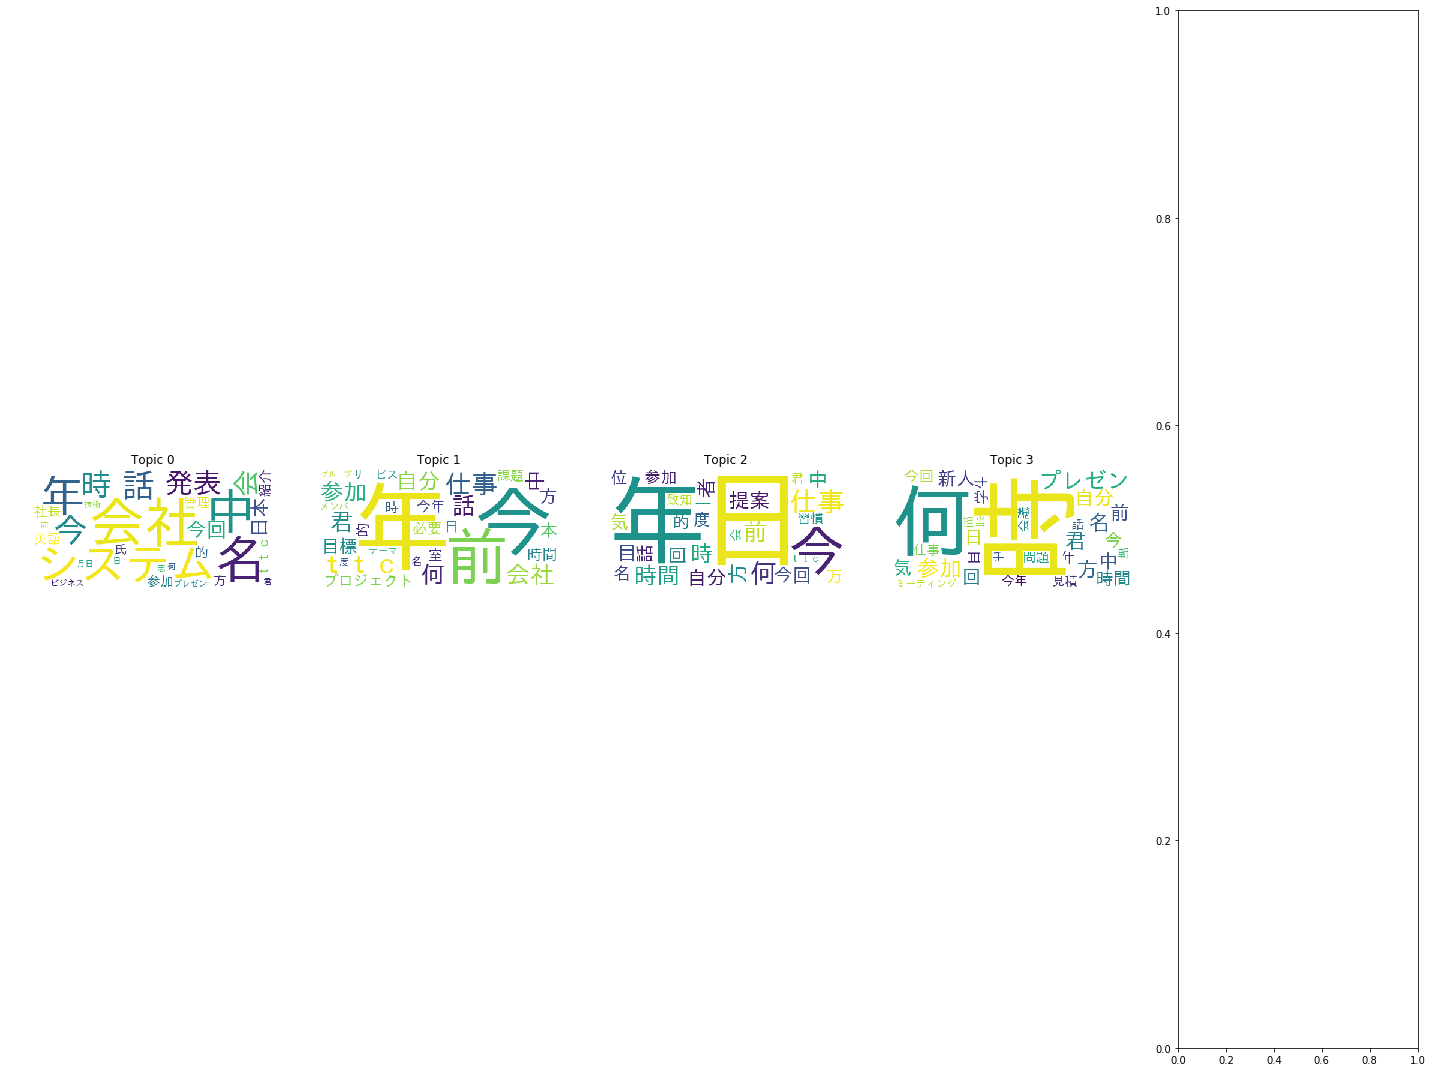

In [21]:
fig, axs = plt.subplots(ncols=5, figsize=(20,15))
axs = axs.flatten()
for i, t in enumerate(range(lda.num_topics)):
    x = dict(lda.show_topic(t, 30))
    im = WordCloud(
        font_path=fpath,
        background_color='white',
        random_state=0
    ).generate_from_frequencies(x)
    axs[i].imshow(im)
    axs[i].axis('off')
    axs[i].set_title('Topic '+str(t))
        
plt.tight_layout()
plt.show()